<a href="https://colab.research.google.com/github/maheshsk78/ESG_TextMining/blob/main/Textile%26Apparel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive/'Shared drives'/'Independent Study'/

 Data		       Fashion_Old-version	 'Summary_Textile&Apparel.xlsx'
'Data Dump.gdoc'      'Fashion Tickers.gsheet'
'Eikon - ESG scores'  'Refinitiv - White Paper'


In [ ]:
#df1= pd.read_excel("/content/drive/Shared drives/Independent Study/Summary_Textile&Apparel.xlsx")
#df1.info()
#df1.dropna(axis=0, how="all", thresh=None, subset=None, inplace=True)
#df1.drop(df1.columns[df1.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
#df1.info()
#df1.head()

In [ ]:
import pandas as pd

In [ ]:
new_df=pd.read_excel("/content/drive/Shared drives/Independent Study/Summary_Textile&Apparel.xlsx")
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           0 non-null      float64
 1   All Good             81 non-null     object 
 2   Unnamed: 2           0 non-null      float64
 3   Recently Got Better  36 non-null     object 
 4   Unnamed: 4           0 non-null      float64
 5   Recently turned Bad  7 non-null      object 
 6   Unnamed: 6           0 non-null      float64
 7   All Bad              69 non-null     object 
dtypes: float64(4), object(4)
memory usage: 7.0+ KB


#Preprocess Text




In [ ]:
#All Good
frame_good=new_df[['All Good']]
frame_good.dropna(axis=0, how="all", thresh=None, subset=None, inplace=True)
#frame_good.info()

#Recently better
frame_rb1=new_df[['Recently Got Better']]
frame_rb1.dropna(axis=0, how="all", thresh=None, subset=None, inplace=True)
#frame_rb1.info()

#Recently bad
frame_rb2=new_df[['Recently turned Bad']]
frame_rb2.dropna(axis=0, how="all", thresh=None, subset=None, inplace=True)
#frame_good.info()

#All Bad
frame_bad=new_df[['All Bad']]
frame_bad.dropna(axis=0, how="all", thresh=None, subset=None, inplace=True)
#frame_bad.info()

import warnings
warnings.simplefilter(action="ignore", category=Warning)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/

#Tokenize & Clean strings

In [ ]:
import regex as re
list_good=[]
list_rb1=[]
list_rb2=[]
list_bad=[]

for index, row in frame_good.iterrows():
   clean_text = re.sub(r"\p{P}+", "", row['All Good'])
   if not clean_text.isdigit():
     list_good.append(clean_text.split())
   else: pass
   #print(clean_text.split())

for index, row in frame_rb1.iterrows():
   clean_text = re.sub(r"\p{P}+", "", row['Recently Got Better'])
   if not clean_text.isdigit():
     list_rb1.append(clean_text.split())
   else: pass
   #print(clean_text.split())

for index, row in frame_rb2.iterrows():
   clean_text = re.sub(r"\p{P}+", "", row['Recently turned Bad'])
   if not clean_text.isdigit():
     list_rb2.append(clean_text.split())
   else: pass
   #print(clean_text.split())  
   
for index, row in frame_bad.iterrows():
   clean_text = re.sub(r"\p{P}+", "", row['All Bad'])
   if not clean_text.isdigit():
     list_bad.append(clean_text.split())
   else: pass
   #print(clean_text.split()) 

In [ ]:
#Count strings in each class
print(len(list_good))
print(len(list_rb1))
print(len(list_rb2))
print(len(list_bad))

81
36
7
69


In [ ]:
from itertools import chain 
fl_good = list(chain.from_iterable(list_good))
fl_rb1 = list(chain.from_iterable(list_rb1))
fl_rb2 = list(chain.from_iterable(list_rb2))
fl_bad = list(chain.from_iterable(list_bad))

word_set = set(fl_good).union(set(fl_rb1)).union(set(fl_rb2)).union(set(fl_bad))

#WordCloud

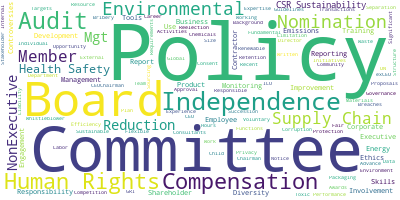

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(fl_good)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

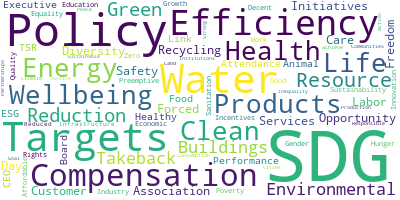

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(fl_rb1)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

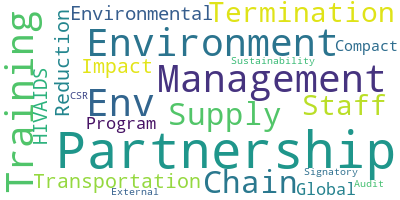

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(fl_rb2)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

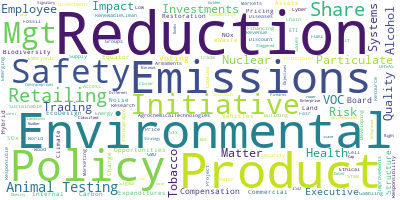

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(fl_bad)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

#CountVectorize - LDA (1)

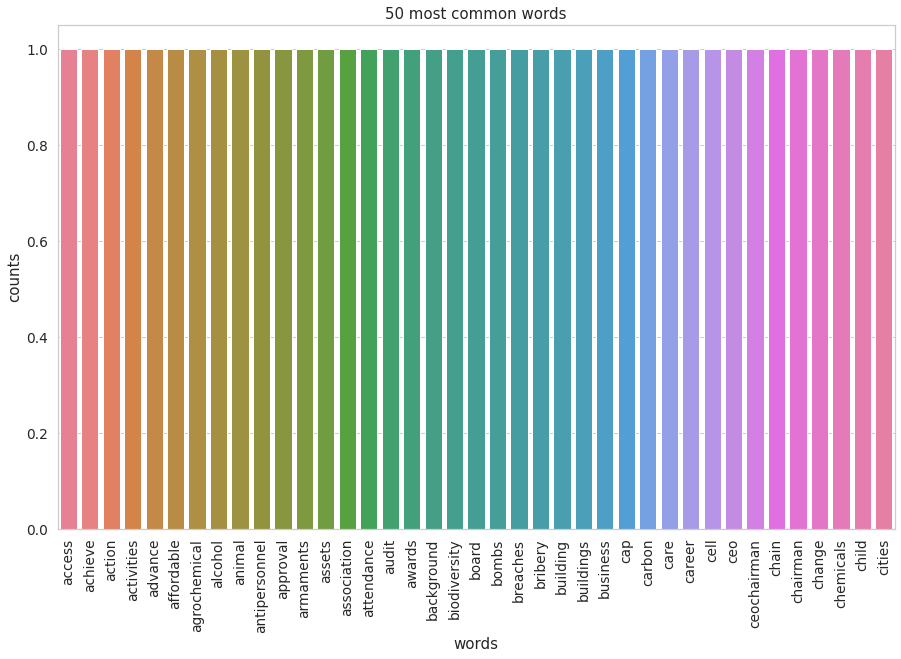

In [ ]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[11:50]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='50 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(word_set)
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

#LDA backend stuff

In [ ]:
#import pandas as pd 
#import sklearn.feature_extraction.text 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer 

#instantiate CountVectorizer() 
cv=CountVectorizer() 
 
# this steps generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(word_set)

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)

# print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
 
# sort ascending 
df_idf.sort_values(by=['idf_weights'],ascending=False)
df_idf.head()

,idf_weights
10,6.114995
11,6.114995
12,6.114995
13,6.114995
14,6.114995


In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

In [ ]:
pip install pyldavis

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 18.5MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=66b6499f1fb0b46afb2d8e5170f126f497f8c5a29e5cbc31b4b05b068872d7c8
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=874634d9f002913bb6a744977b460ddf08c0bd2ea27e8d25557821059445302b
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyldavis funcy


In [ ]:
import pyLDAvis
from pyLDAvis import sklearn as sklearn_lda

LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

#Visualization - LDA

In [ ]:
pyLDAvis.display(LDAvis_prepared)